In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
gene_sample_file = "ACC.combinedData_sorted.txt"

gene_sample_df = pd.read_csv(
    gene_sample_file,
    sep="\s+",
    header=None,
    names=["row", "column", "mutation", "gene", "sample"],
    skiprows=1
)

# Extract the original order of samples and genes
sample_order = gene_sample_df['sample'].drop_duplicates().tolist()
gene_order = gene_sample_df['gene'].drop_duplicates().tolist()

gene_sample_pivot = gene_sample_df.pivot_table(
    index="gene",
    columns="sample",
    values="mutation",
    aggfunc='first',
    fill_value=0
)

gene_sample_pivot = gene_sample_pivot.reindex(index=gene_order, columns=sample_order)

# Display the results
print("Number of rows (genes):", gene_sample_pivot.shape[0])
print("Number of columns (samples):", gene_sample_pivot.shape[1])

print("Updated Gene-Sample Mutation Matrix:")
gene_sample_pivot.head()


Number of rows (genes): 18865
Number of columns (samples): 309
Updated Gene-Sample Mutation Matrix:


sample,TCGA-OR-A5J1,TCGA-OR-A5J2,TCGA-OR-A5J3,TCGA-OR-A5J4,TCGA-OR-A5J6,TCGA-OR-A5J7,TCGA-OR-A5J8,TCGA-OR-A5JA,TCGA-OR-A5JB,TCGA-OR-A5JC,...,normal_401,normal_403,normal_404,normal_423,normal_424,normal_427,normal_428,normal_429,normal_431,normal_432
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000005381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000135537,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ENSG00000135521,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ENSG00000135506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000135503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
non_normal_columns = [col for col in gene_sample_pivot.columns if col.startswith('TCGA')]
non_zero_counts_per_row = (gene_sample_pivot[non_normal_columns] != 0).sum(axis=1)
print("\nNumber of non-zero entries per gene (excluding 'normal' samples):")
print(non_zero_counts_per_row)


Number of non-zero entries per gene (excluding 'normal' samples):
gene
ENSG00000005381     0
ENSG00000135537     0
ENSG00000135521     0
ENSG00000135506     0
ENSG00000135503     0
                   ..
ENSG00000256436    50
ENSG00000127418    53
ENSG00000197915    53
ENSG00000184956    55
ENSG00000145113    55
Length: 18865, dtype: int64


In [19]:
# Calculate total entries in the matrix
total_entries = gene_sample_pivot.size

# Calculate the number of zero entries
zero_entries = (gene_sample_pivot == 0).sum().sum()

# Calculate sparsity
sparsity = zero_entries / total_entries

print(f"Sparsity of the gene-sample mutation matrix: {sparsity:.2%}")


Sparsity of the gene-sample mutation matrix: 96.42%


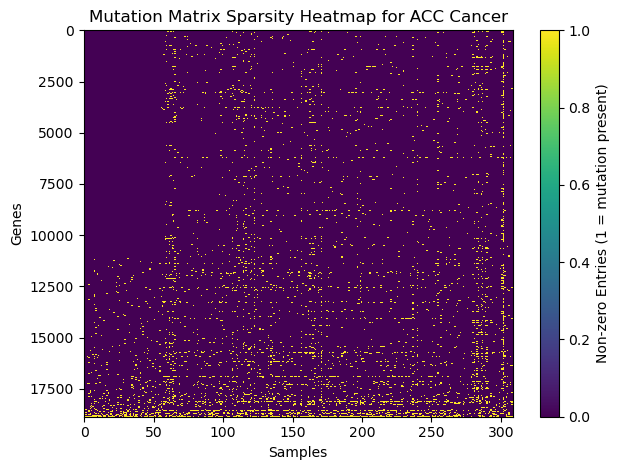

In [20]:
#plt.figure(figsize=(12, 8))
plt.imshow(gene_sample_pivot != 0, cmap="viridis", aspect="auto", interpolation="nearest")
plt.colorbar(label="Non-zero Entries (1 = mutation present)")
plt.title("Mutation Matrix Sparsity Heatmap for ACC Cancer")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()